In [1]:
import pandas as pd
elec = pd.read_csv('eco2mix-regional-cons-def.csv', sep = ';', usecols = [0, 1, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13],
                   names = ['code', 'reg', 'date', 'heure', 'cons', 'therm', 'nucl', 'eol', 'sol', 'hydrau', 'pomp', 'bio'],
                   parse_dates = {'date-heure': ['date', 'heure']}, header = 0)

In [4]:
elec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1927296 entries, 0 to 1927295
Data columns (total 11 columns):
 #   Column      Dtype         
---  ------      -----         
 0   date-heure  datetime64[ns]
 1   code        int64         
 2   reg         object        
 3   cons        float64       
 4   therm       float64       
 5   nucl        float64       
 6   eol         float64       
 7   sol         float64       
 8   hydrau      float64       
 9   pomp        float64       
 10  bio         float64       
dtypes: datetime64[ns](1), float64(8), int64(1), object(1)
memory usage: 161.7+ MB


In [5]:
# Variables globales
liste_reg = elec['reg'].unique()
liste_code = elec['code'].unique()

In [6]:
def code2reg(code):
    dict_code_reg = dict(zip(liste_code, liste_reg))
    return dict_code_reg[code]
code2reg(44)

'Grand Est'

In [7]:
def reg2code(reg):
    dict_reg_code = dict(zip(liste_reg, liste_code))
    return dict_reg_code[reg]
reg2code("Provence-Alpes-Côte d'Azur")

93

In [8]:
# Je rajoute une colonne Production “prod”
elec['prod'] = elec.iloc[:, 4:11].sum(axis = 1)

In [9]:
# J’enlève les 12 premières lignes où il n’y a pas de valeurs
elec = elec[12:]

In [10]:
# Je réinitialise l’index et je laisse tomber la colonne “Index”
elec = elec.reset_index(drop = True)

In [38]:
# Je crée une colonne Échange “ech” qui permet de savoir si le solde énergétique est positif ou négatif
elec['ech'] = elec['prod'] - elec['cons']

In [17]:
elec.head(20)

,date-heure,code,reg,cons,therm,nucl,eol,sol,hydrau,pomp,bio,prod,ech
0,2013-01-01 00:30:00,24,Centre-Val de Loire,2476.0,90.0,9085.0,508.0,0.0,34.0,NaN,25.0,9742.0,7266.0
1,2013-01-01 00:30:00,44,Grand Est,4943.0,319.0,9137.0,1109.0,0.0,1418.0,0.0,57.0,12040.0,7097.0
2,2013-01-01 00:30:00,11,Île-de-France,9134.0,685.0,NaN,16.0,0.0,0.0,NaN,142.0,843.0,-8291.0
3,2013-01-01 00:30:00,52,Pays de la Loire,3595.0,127.0,NaN,182.0,0.0,0.0,NaN,32.0,341.0,-3254.0
4,2013-01-01 00:30:00,76,Occitanie,5228.0,78.0,2497.0,367.0,0.0,943.0,-13.0,81.0,3953.0,-1275.0
5,2013-01-01 00:30:00,28,Normandie,3683.0,432.0,8200.0,216.0,0.0,12.0,NaN,54.0,8914.0,5231.0
6,2013-01-01 00:30:00,93,Provence-Alpes-Côte d'Azur,5570.0,537.0,NaN,12.0,0.0,1412.0,0.0,58.0,2019.0,-3551.0
7,2013-01-01 00:30:00,27,Bourgogne-Franche-Comté,2357.0,236.0,NaN,106.0,0.0,105.0,0.0,12.0,459.0,-1898.0
8,2013-01-01 00:30:00,32,Hauts-de-France,5989.0,828.0,4499.0,1115.0,0.0,1.0,NaN,69.0,6512.0,523.0
9,2013-01-01 00:30:00,84,Auvergne-Rhône-Alpes,8173.0,252.0,12069.0,257.0,0.0,3079.0,-4.0,68.0,15721.0,7548.0


In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

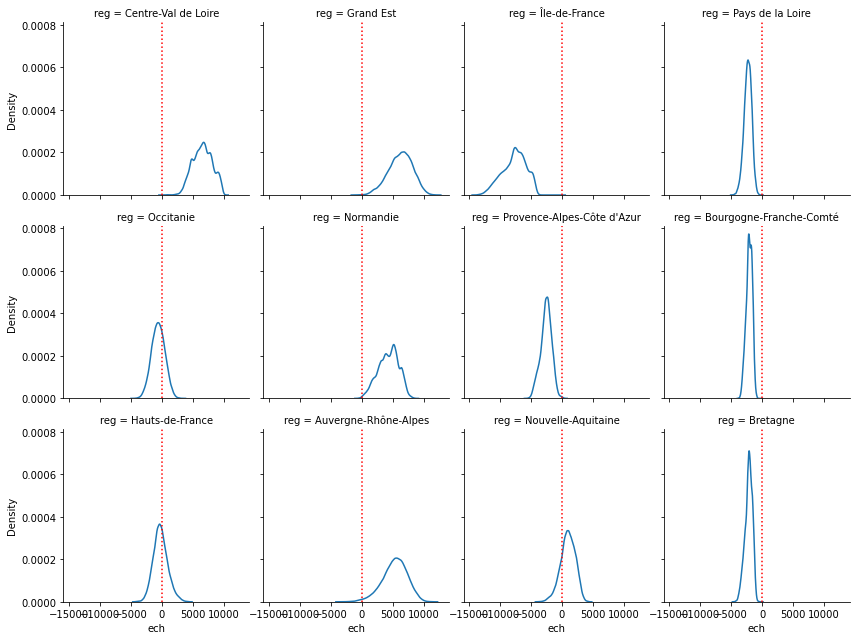

In [19]:
g = sns.FacetGrid(elec, col = 'reg', col_wrap = 4)
g.map(sns.kdeplot, 'ech')
for ax in g.axes.ravel():
    ax.axvline(x=0, ls=':', c='red')

In [42]:
print('Les régions strictement exportatrices sont la région “Grand Est”, “Centre-Val de Loire”, “Normandie”, “Auvergne-Rhône-Alpes')
print('Les régions strictement importatrices sont “Pays de la Loire”, “Bourgogne-Franche-Comté”, “Île-de-France”, “Bretagne”, “Provence-Alpes-Côte-Côte d’Azur”')

Les régions strictement exportatrices sont la région “Grand Est”, “Centre-Val de Loire”, “Normandie”, “Auvergne-Rhône-Alpes
Les régions strictement importatrices sont “Pays de la Loire”, “Bourgogne-Franche-Comté”, “Île-de-France”, “Bretagne”, “Provence-Alpes-Côte-Côte d’Azur”


In [43]:
# Est-ce que les régions strictement exportatrices sont celles qui ont une ou plusieurs centrales nucléaires et les régions strictement importatrices
# sont celles qui n’en ont pas ?

In [81]:
# Je crée une base de donnée groupée par région et par date
elec_reg= elec.set_index(['code', 'date-heure'])

In [82]:
elec_reg.sort_index()

reg    cons   therm  nucl  \
code date-heure                                                              
11   2013-01-01 00:30:00               Île-de-France  9134.0   685.0   NaN   
     2013-01-01 01:00:00               Île-de-France  8822.0   685.0   NaN   
     2013-01-01 01:30:00               Île-de-France  8499.0   685.0   NaN   
     2013-01-01 02:00:00               Île-de-France  8229.0   685.0   NaN   
     2013-01-01 02:30:00               Île-de-France  8150.0   677.0   NaN   
...                                              ...     ...     ...   ...   
93   2022-02-28 21:30:00  Provence-Alpes-Côte d'Azur  5552.0  1876.0   NaN   
     2022-02-28 22:00:00  Provence-Alpes-Côte d'Azur  5485.0  1870.0   NaN   
     2022-02-28 22:30:00  Provence-Alpes-Côte d'Azur  5400.0  1847.0   NaN   
     2022-02-28 23:00:00  Provence-Alpes-Côte d'Azur  5540.0  1856.0   NaN   
     2022-02-28 23:30:00  Provence-Alpes-Côte d'Azur  5814.0  1839.0   NaN   

                           eol  sol  hydrau  pomp    bio    prod     ech  
code date-heure                                                           
11   2013-01-01 00:30:00  16.0  0.0     0.0   NaN  142.0   843.0 -8291.0  
     2013-01-01 01:00:00  16.0  0.0     0.0   NaN  142.0   843.0 -7979.0  
     2013-01-01 01:30:00  15.0  0.0     0.0   NaN  146.0   846.0 -7653.0  
     2013-01-01 02:00:00  15.0  0.0     0.0   NaN  153.0   853.0 -7376.0  
     2013-01-01 02:30:00  16.0  0.0     0.0   NaN  146.0   839.0 -7311.0  
...                        ...  ...     ...   ...    ...     ...     ...  
93   2022-02-28 21:30:00  18.0  0.0   503.0   0.0  116.0  2513.0 -3039.0  
     2022-02-28 22:00:00  14.0  0.0   506.0   0.0  115.0  2505.0 -2980.0  
     2022-02-28 22:30:00  13.0  0.0   507.0   0.0  115.0  2482.0 -2918.0  
     2022-02-28 23:00:00  15.0  0.0   558.0   0.0  118.0  2547.0 -2993.0  
     2022-02-28 23:30:00  12.0  0.0   529.0   0.0  117.0  2497.0 -3317.0  

[1927284 rows x 11 columns]

In [42]:
import numpy as np
regions_triees = np.sort(elec['reg'].unique())

In [83]:
# Je mets dans elec_reg_nucl un boolén qui indique, par région, s’il y a eu de la production nucléaire ou pas
elec_reg_nucl = elec_reg.groupby('reg')['nucl'].any()

In [84]:
elec_reg_nucl.map({True : 'Centrale nucléaire', False : 'Pas de centrale'})

reg
Auvergne-Rhône-Alpes          Centrale nucléaire
Bourgogne-Franche-Comté          Pas de centrale
Bretagne                         Pas de centrale
Centre-Val de Loire           Centrale nucléaire
Grand Est                     Centrale nucléaire
Hauts-de-France               Centrale nucléaire
Normandie                     Centrale nucléaire
Nouvelle-Aquitaine            Centrale nucléaire
Occitanie                     Centrale nucléaire
Pays de la Loire                 Pas de centrale
Provence-Alpes-Côte d'Azur       Pas de centrale
Île-de-France                    Pas de centrale
Name: nucl, dtype: object

In [74]:
print('Les régions qui n’ont jamais eu de centrales nucléaires sont :', regions_triees[~elec_reg_nucl])
print('Les régions strictement importatrices sont “Pays de la Loire”, “Bourgogne-Franche-Comté”, “Île-de-France”, “Bretagne”, “Provence-Alpes-Côte-Côte d’Azur”')

Les régions qui n’ont jamais eu de centrales nucléaires sont : ['Bourgogne-Franche-Comté' 'Bretagne' 'Pays de la Loire'
 "Provence-Alpes-Côte d'Azur" 'Île-de-France']
Les régions strictement importatrices sont “Pays de la Loire”, “Bourgogne-Franche-Comté”, “Île-de-France”, “Bretagne”, “Provence-Alpes-Côte-Côte d’Azur”


In [75]:
print('Assez logiquement, les régions strictement importatrices sont celles qui n’ont jamais de centrales nucléaires.')

Assez logiquement, les régions strictement importatrices sont celles qui n’ont jamais de centrales nucléaires.


In [115]:
elec_reg_triee = elec_reg.sort_index()

In [116]:
code_reg_nucl = [reg2code(x) for x in regions_triees[elec_reg_nucl]]

In [117]:
code_reg_nucl

[84, 24, 44, 32, 28, 75, 76]

In [118]:
elec_reg_triee.loc[code_reg_nucl]

reg    cons  therm     nucl    eol  \
code date-heure                                                                 
84   2013-01-01 00:30:00  Auvergne-Rhône-Alpes  8173.0  252.0  12069.0  257.0   
     2013-01-01 01:00:00  Auvergne-Rhône-Alpes  7944.0  252.0  11895.0  257.0   
     2013-01-01 01:30:00  Auvergne-Rhône-Alpes  7896.0  252.0  12228.0  247.0   
     2013-01-01 02:00:00  Auvergne-Rhône-Alpes  7882.0  251.0  12274.0  244.0   
     2013-01-01 02:30:00  Auvergne-Rhône-Alpes  7909.0  251.0  12228.0  245.0   
...                                        ...     ...    ...      ...    ...   
76   2022-02-28 21:30:00             Occitanie  4885.0  123.0   1249.0  435.0   
     2022-02-28 22:00:00             Occitanie  4714.0  123.0   1251.0  474.0   
     2022-02-28 22:30:00             Occitanie  4759.0  123.0   1250.0  546.0   
     2022-02-28 23:00:00             Occitanie  5051.0  123.0   1253.0  604.0   
     2022-02-28 23:30:00             Occitanie  4846.0  123.0   1253.0  666.0   

                          sol  hydrau   pomp   bio     prod     ech  
code date-heure                                                      
84   2013-01-01 00:30:00  0.0  3079.0   -4.0  68.0  15721.0  7548.0  
     2013-01-01 01:00:00  0.0  2828.0 -328.0  67.0  14971.0  7027.0  
     2013-01-01 01:30:00  0.0  2710.0 -327.0  65.0  15175.0  7279.0  
     2013-01-01 02:00:00  0.0  2516.0 -328.0  66.0  15023.0  7141.0  
     2013-01-01 02:30:00  0.0  2440.0 -406.0  67.0  14825.0  6916.0  
...                       ...     ...    ...   ...      ...     ...  
76   2022-02-28 21:30:00  2.0  2328.0   -9.0  88.0   4216.0  -669.0  
     2022-02-28 22:00:00  2.0  1847.0   -9.0  89.0   3777.0  -937.0  
     2022-02-28 22:30:00  1.0  1721.0   -9.0  87.0   3719.0 -1040.0  
     2022-02-28 23:00:00  1.0  2072.0   -9.0  88.0   4132.0  -919.0  
     2022-02-28 23:30:00  1.0  1492.0   -9.0  89.0   3615.0 -1231.0  

[1124249 rows x 11 columns]

In [123]:
elec_nuclaire = elec_reg_triee.loc[code_reg_nucl, 'nucl']

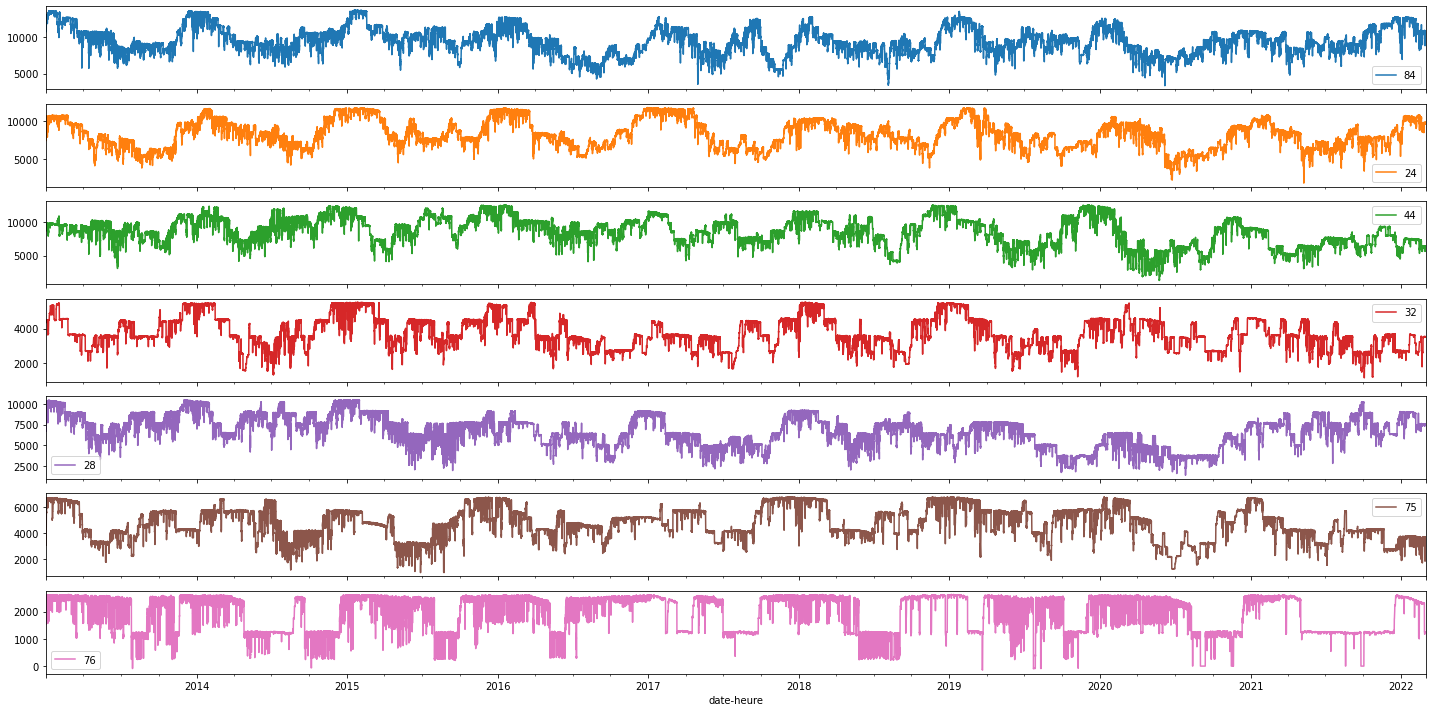

In [125]:
ax = elec_nuclaire.unstack(level=0).plot(subplots=True, rot=0, figsize=(20, 10))
plt.tight_layout()